In [1]:
import pandas as pd
from datascience import *
from sympy import *
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use("seaborn-muted")

We would like to thank Professor Raymond Hawkins for his Economics 100B Problem Set that served as the basis for this assignment.

# Project 1: Modeling Macroeconomic Variables using the Cobb-Douglas Production Function

The goal of this homework is to gain experience the following steps of data science:

1. Downloading and converting raw data files into a format that you can interact with
2. Identifying and visualizing overall trends in the data using a process called Exploratory Data Analysis or EDA
3. Using the data to complete a problem of prediction

We hope that at the end of this, you will see how the skills that you have learned in Data 8 and this class can prepare for dealing with real world datasets, and how you can investigate them to answer questions.

The question you will be answering today is the following: How can we apply the Cobb-Douglas Production Function to understand the different ways countries produce output or GDP?

# Part 1: Getting the data and simplifying the problem

In almost all cases in industry, and later on in this class, you will have to find the dataset that can answer the question that you are trying to solve. However, as we are introducing you to this process, we will be providing the link to such a dataset.

The dataset we will be using today is called "Penn World Table" (PWT) and was compiled by the University of Groningen. It catalogues information on relative levels of income, output, input and productivity for 182 countries between 1950 and 2017.

Your task:
1. Go to: https://www.rug.nl/ggdc/productivity/pwt/ and download the Excel datafile.
2. Open the excel file and convert the "Data" sheet to a .csv file (Comma Seperated Value).
3. Place this file in the same folder as this Notebook.
4. Edit the line ```file_name``` such that it matches the name of the .csv file.
5. Run the code cell below.

In [2]:
### Edit the line below ###
file_name = ...

### Solution ###
file_name = "pwt91.csv"

### Do not change the line below ###
data = Table().read_table(file_name, engine='python')

Congratulations! You have converted an online dataset into a datatable that you can explore and manipulate in Python! Now, this dataset is saved under the table called ```data```. Look at the first 5 lines below:

In [3]:
data.show(5)

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1951,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1952,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1953,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1954,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


There are a lot of data columns in the table. As we will be using the Cobb-Douglas Production Function, think about what variables are needed in the equation, and which ones we can take from the table. This is an important part of the data science process: understanding the dataset that you are using. Most real-world datasets provide documentation listing the definitions and equations underlying each variable. 

PWT provides this and has identified three variables that will be helpful to us:
1. cn => Capital Stock in millions of USD
2. cgdpe => Expenditure-side Real GDP in millions of USD
3. emp => Number of Persons employed in millions

<div class="alert alert-info">
    
<h3> Question 1.1. </h3>
In the cell below list the variables used in the Cobb-Douglas that are missing from the dataset. What does each variable tell about how output is produced?
</div>

** Your answer here **

<div class="alert alert-info">
    
<h3> Question 1.2. </h3>
Remove all columns except for <code>cn</code>, <code>rgdpe</code>, <code>emp</code>, <code>country</code> and <code>year</code> from <code>data</code>. Ensure that <code>country</code> and <code>year</code> are the two left-most columns. Call the new table <code>cleaned_data</code> and display its first few rows. Rename the <code>cn</code> column to <code>Capital Stock</code>, <code>cgdpe</code> to <code>Real GDP</code> and <code>emp</code> to <code>Labor Force</code>. Do not be afraid if you see a lot of <code>nan</code> values - it just means there is no data for that country-year.
</div>

In [4]:
### Your code here ###
cleaned_data = ...

### Solution ###
cleaned_data = data.select("country", "year", "cn", "cgdpe", "emp")
cleaned_data.relabel("cn", "Capital Stock").relabel("cgdpe", "Real GDP").relabel("emp", "Labor Force")
###

cleaned_data.show(5)

country,year,Capital Stock,Real GDP,Labor Force
Aruba,1950,nan,nan,nan
Aruba,1951,nan,nan,nan
Aruba,1952,nan,nan,nan
Aruba,1953,nan,nan,nan
Aruba,1954,nan,nan,nan


Our goal will be to predict what these variables are for each of the countries that we will be examining. From these, we will be able to compare how output is produced in each of these countries. The question is, how can we use the Cobb-Douglas equation to solve for the missing variables? An easy way would be to take the natural log of the equation, making it linear. We can then rewrite the log-linear version of the equation in the slope-intercept format, providing us with ways to quantify $\alpha$ and $A$.

<div class="alert alert-info">

<h3>Question 1.3.</h3>
In the cell below, using LaTeX, take the natural log of the Cobb-Douglas Production Function. Rewrite in slope-intercept format. Write down your observations about this equation below your work.
</div>

** Your answer here **

Solution: They see this relationship in the data. Then, they see the intercept to be A and the slope to be $\alpha$.
$$
\ln(Y) = \ln(A) + \alpha \ln(K) + (1 - \alpha) \ln(L) \\
\ln(Y) = \ln(A) + \alpha \left ( \ln(K) - \ln(L) \right ) + \ln(L) \\
\ln \left (\dfrac{Y}{L} \right ) = \ln(A) + \alpha \ln \left ( \dfrac{K}{L} \right )
$$
From there, they can do this for all the countries then compare their values.

# Part 2: Exploring the Data

Now we are going to visualize trends in each of the variables for different countries.

<div class="alert alert-info">
    
<h3>Question 2.1.</h3> 
Create a table of GDP, Capital Stock and Labor for the USA from 1990 to 2017. Do the same for China and two other countries of your choice. Place all of this data in one table called <code>comparison_data</code>.
</div>

In [10]:
### Your code here ###
country_array = ...
comparison_data = ...

### Solution ###
country_array = make_array("Austria", "United States", "China", "Philippines")
comparison_data = cleaned_data.where("country", are.contained_in(countries)).where("year", are.between(1990, 2017))
comparison_data.show(5)

country,year,Capital Stock,Real GDP,Labor Force
Austria,1990,711125,193506,3.56034
Austria,1991,751434,205200,3.59103
Austria,1992,791122,213520,3.59443
Austria,1993,842606,218250,3.57332
Austria,1994,892193,227395,3.58372


<div class="alert alert-info">
    
<h3>Question 2.2.</h3>
To help us in later questions, fill in the blanks in the <code>country_table_plotter</code> function below. Its inputs will be a table of the form <code>comparison_data</code> and the names of the two columns plotted, <code>columnX</code> and <code>columnY</code> <code>country_table_plotter</code> will plot <code>columnX</code> versus <code>columnY</code> for all the countries contained in <code>data_table</code>.
</div>

In [15]:
def country_table_plotter(data_table, countries, columnX, columnY):
    
    ### Your code here ###
    for country in ...:
        plt.plot(..., ..., label = country, linewidth = 1)
    
    ### Solution ###
    for country in countries:
        current_country_table = data_table.where("country", country)
        plt.plot(current_country_table.column(columnX), current_country_table.column(columnY), label = country, linewidth = 1)
    
    
    ### Do not change the code below ###
    plt.legend()
    plt.xlabel(columnX)
    plt.ylabel(f"{columnY} (Logarithmic Scale)")
    plt.yscale("log")

<div class="alert alert-info">
    
<h3>Question 2.3.</h3>
Produce a plot of time and capital stock for the countries in your table. In the markdown cell below, identify differences between the countries and discuss what surprised you.
</div>

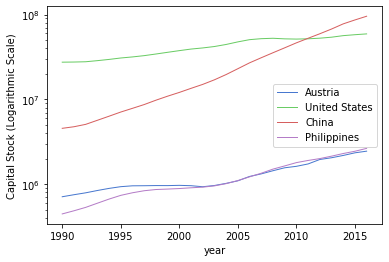

In [16]:
### Your code here ###

### Solution ###
country_table_plotter(comparison_data, country_array, "year", "Capital Stock")

- United States:

- China:

- Your Country:

- Your Country:

<div class="alert alert-info">
    
<h3>Question 2.4.</h3>
Produce a similar plot, but this time of time and labor for the countries in your table. In the markdown cell below, identify differences between the countries and discuss what surprised you.
</div>

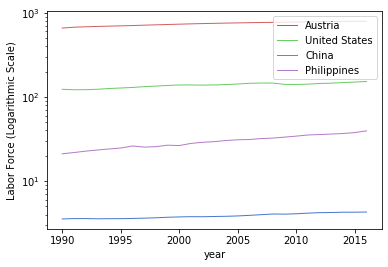

In [18]:
### Your code here ###

### Solution ###
country_table_plotter(comparison_data, country_array, "year", "Labor Force")

- United States:

- China:

- Your Country:

- Your Country:

<div class="alert alert-info">
    
<h3>Question 2.5.</h3>
Create a plot of time and GDP for the countries in your table. In the markdown cell below, using your knowledge of the Cobb-Douglas Production Function, identify differences between the countries and discuss these in relation to your findings about each of the country's levels of capital stock and labor. Also note about how these have changed over time, if at all.
</div>

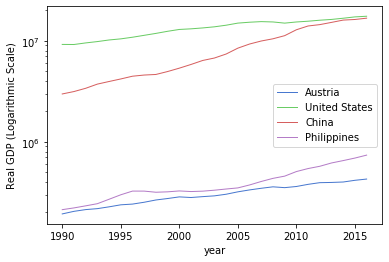

In [19]:
### Your code here ###

### Solution ###
country_table_plotter(comparison_data, country_array, "year", "Real GDP")

- United States:

- China:

- Your Country:

- Your Country:

# Part 3: Prediction and Comparison

We are now going to provide numerical backing to your discussions above by predicting values for $\alpha$ and $A$ for each of the 4 countries that we are examining. To do this, we will revisit the equation that you derived in part 1. 

<div class="alert alert-info">
    
<h3>Question 3.1.</h3>
A key step in the original paper by Cobb and Douglas was that they converted the data into an index. This is important because the data is measured in different units. Do this for each country and each of the variables. Let the 2011 value be the base year, i.e. 100. Place this in a new table called <code>indexed_data</code> together with <code>country</code> and <code>year</code> columns. Display the first few rows.
</div>

In [22]:
base_values = comparison_data.where("year", 2011)
country_base_values = base_values.where("country", "United States")

In [26]:
country_base_values

country,year,Capital Stock,Real GDP,Labor Force
United States,2011,5.18479e+07,1.56239e+07,142.01


In [34]:
### Do not change the code below ###
base_values = comparison_data.where("year", 2011)
indexed_Ks = make_array()
indexed_Ls = make_array()
indexed_Ys = make_array()


for country in ...:
    country_base_values = base_values.where(..., ...)
    current_Ks = comparison_data.where(..., ...).column(...) / ...
    current_Ls = comparison_data.where(..., ...).column(...) / ...
    current_Ys = comparison_data.where(..., ...).column(...) / ...
    
    indexed_Ks = np.append(..., ...)
    indexed_Ls = np.append(..., ...)
    indexed_Ys = np.append(..., ...)
    
indexed_data = Table().with_columns("country", ...
                                   "year", ...
                                   "Indexed K", ...
                                   "Indexed L", ...
                                   "Indexed Y", ...
                                   )

indexed_data.show(5)

### Solution ###

for country in country_array:
    country_base_values = base_values.where("country", country)
    curr_Ks = comparison_data.where("country", country).column("Capital Stock") / country_base_values.column("Capital Stock")
    curr_Ls = comparison_data.where("country", country).column("Labor Force") / country_base_values.column("Labor Force")
    curr_Ys = comparison_data.where("country", country).column("Real GDP") / country_base_values.column("Real GDP")
    indexed_Ks = np.append(indexed_Ks, curr_Ks)
    indexed_Ls = np.append(indexed_Ls, curr_Ls)
    indexed_Ys = np.append(indexed_Ys, curr_Ys)

indexed_data = Table().with_columns("country", comparison_data.column("country"), "year", comparison_data.column("year"),
                    "Indexed K", indexed_Ks, "Indexed L", indexed_Ls, "Indexed Y", indexed_Ys)

indexed_data.show(5)

country,year,Indexed K,Indexed L,Indexed Y
Austria,1990,0.410369,0.853537,0.509726
Austria,1991,0.43363,0.860893,0.540531
Austria,1992,0.456533,0.861708,0.562447
Austria,1993,0.486242,0.856647,0.574905
Austria,1994,0.514858,0.859141,0.598996
Austria,1995,0.539454,0.859437,0.627202
Austria,1996,0.552274,0.864605,0.637664
Austria,1997,0.553609,0.871569,0.664993
Austria,1998,0.556011,0.880324,0.700207
Austria,1999,0.555394,0.893058,0.723877


<div class="alert alert-info">
    
<h3>Question 3.2a.</h3>
Using the equation you derived in part 1 and the <code>indexed_data</code> table, calculate the two log ratios that you need to perform linear regression. Place them in the table <code>log_ratios</code> in the code cell below and display the first few rows. Name the columns appropriately.
</div>

In [46]:
### Your code here ###
log_ratios = ...

### Solution ###
log_ratios = Table().with_columns("country", indexed_data.column("country"),
                                  "year", indexed_data.column("year"),
                                  "ln(Y/L)", np.log(indexed_data.column("Indexed Y")/indexed_data.column("Indexed L")),
                                  "ln(K/L)", np.log(indexed_data.column("Indexed K")/indexed_data.column("Indexed L")))
###

log_ratios.show(5)

country,year,ln(Y/L),ln(K/L)
Austria,1990,-0.515516,-0.732332
Austria,1991,-0.465418,-0.685779
Austria,1992,-0.42662,-0.635256
Austria,1993,-0.398821,-0.566319
Austria,1994,-0.360679,-0.512042


<div class="alert alert-info">
    
<h3>Question 3.2b.</h3>
Using the <code>country_table_scatter</code> function, plot the log ratios for each country from the <code>log_ratios</code> table below.
</div>

In [47]:
### Do not change the code below ###
def country_table_scatter(data_table, columnX, columnY):
    # First getting a list of all the countries in data_table
    country_list = data_table.group("country").column("country")
    
    # For each country, creating a plot of columnX vs. columnY
    for country in country_list:
        curr_data_table = data_table.where("country", country)
        curr_data_table.scatter(columnX, columnY)
        plt.title(country)

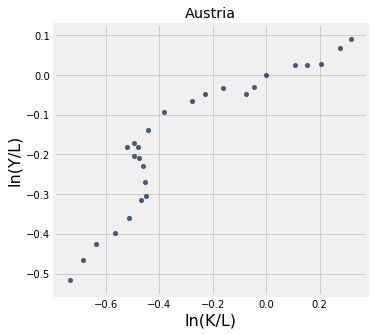

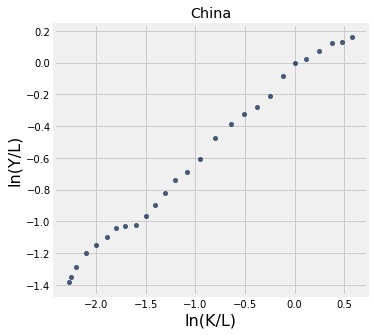

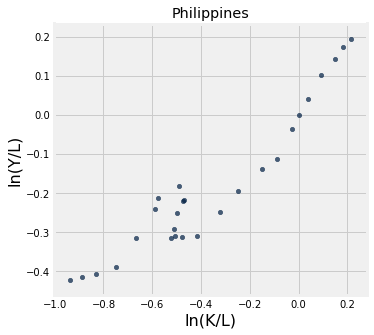

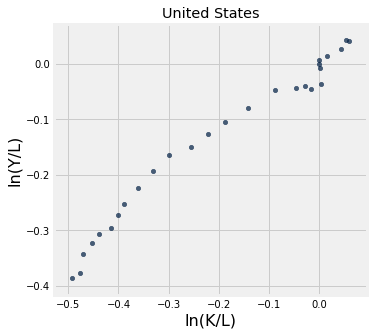

In [48]:
### Your code here ###

### Solution ###
country_table_scatter(log_ratios, "ln(K/L)", "ln(Y/L)")

Now, onto the actual linear regression part of this project.

We will be using sklearn's linear regression function to get the $\alpha$ and $A$ values for each country. Here is the link to the documentation of the <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"> function</a>: 

Let us break down how this function works by taking a look at the examples section of the documentation.
``` 
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
```
The ```LinearRegression()``` function creates a LinearRegression object that has many different functions that we will be using, mainly ```.fit()``` and attributes like ```.coef_``` and ```.intercept_```. The ```.fit(X, y)``` function fits a line using the ```X``` and ```y``` arrays passed into it.

```
reg.coef_
array([1., 2.])
reg.intercept_ 
3.0000...
reg.predict(np.array([[3, 5]]))
array([16.])
```

After we have fit a line to the data, we can then get the corresponding attributes that we need: the slope coefficient and intercept. The example above is in 3 dimensions, hence the two slope coefficients. Our data is in 2 dimensions so we will only get one slope coefficient and intercept per country. Think about the relationship between $\alpha$ and $A$ with regards to the slope and intercept from a linear regression fit?

<div class="alert alert-info">

<h3>Question 3.3a.</h3>
Using Sklearn's Linear Regression function, fit the data taken from each country. Think about what should be passed into the <code>fit()</code> function. If you are confused about this, take a look at the sklearn <a href ="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit"> documentation</a>:           

</div>

In [51]:
### Create arrays of the data we will need from each country. ###
### Think about which variable should be on each axis. ###

china_x = ...
china_y = ...
us_x = ...
us_y = ...
country1_x = ...
country1_y = ...
country2_x = ...
country2_y = ...

### Solution ###

china_x = log_ratios.where("country", "China").column("ln(K/L)")
china_y = log_ratios.where("country", "China").column("ln(Y/L)")
us_x = log_ratios.where("country", "United States").column("ln(K/L)")
us_y = log_ratios.where("country", "United States").column("ln(Y/L)")
country1_x = log_ratios.where("country", "Austria").column("ln(K/L)")
country1_y = log_ratios.where("country", "Austria").column("ln(Y/L)")
country2_x = log_ratios.where("country", "Philippines").column("ln(K/L)")
country2_y = log_ratios.where("country", "Philippines").column("ln(Y/L)")

### Do not change the code below ###

model_china = LinearRegression().fit(china_x.reshape(-1, 1), china_y.reshape(-1, 1))
model_us = LinearRegression().fit(us_x.reshape(-1, 1), us_y.reshape(-1, 1))
model_country1 = LinearRegression().fit(country1_x.reshape(-1, 1), country1_y.reshape(-1, 1))
model_country2 = LinearRegression().fit(country2_x.reshape(-1, 1), country2_y.reshape(-1, 1))

<div class="alert alert-info">
    
<h3>Question 3.3b.</h3>
Now that we have fit the data of each country, we can then retrieve the slope and intercept of each fit. Using the equation you derived in question 1.3., fill in the blanks in the print statements below such that they display the $\alpha$ and $A$ values for each country.
</div>

In [53]:
print(f"China alpha value: {...}")
print(f"United States alpha value: {...}")
print(f"... alpha value: {...}")
print(f"... alpha value: {...}")

### Solution ###
print(f"Austria alpha value: {model_at.coef_}")
print(f"China alpha value: {model_china.coef_}")
print(f"Philippines alpha value: {model_ph.coef_}")
print(f"United States alpha value: {model_us.coef_}")

Austria alpha value: [[0.50611704]]
China alpha value: [[0.55538509]]
Philippines alpha value: [[0.52129992]]
United States alpha value: [[0.6915179]]


In [255]:
print(f"China A value: {...}")
print(f"United States A value: {...}")
print(f"... A value: {...}")
print(f"... A value: {...}")

### Solution ###
print(f"Austria A value: {np.exp(model_at.intercept_)}")
print(f"China A value: {np.exp(model_china.intercept_)}")
print(f"Philippines A value: {np.exp(model_ph.intercept_)}")
print(f"United States A value: {np.exp(model_us.intercept_)}")

Austria A value: [0.9846097]
China A value: [0.92970855]
Philippines A value: [1.00682545]
United States A value: [0.99953375]


<div class="alert alert-info">
    
<h3>Question 3.4.</h3>
With reference to the $\alpha$ and $A$ values for each of the countries you have examined, what do they indicate about that country's ability to produce output as measured through GDP? How does the allocation of scare resources as inputs to production differ between them? How about the role of technology or research and development?
</div>

** Your answer here **

# Congratulations! You've completed the project!